In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

3


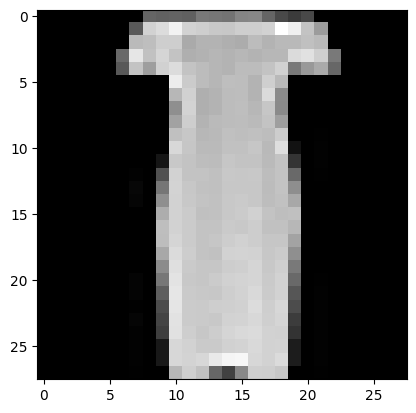

In [5]:
import matplotlib.pyplot as plt

idx = 51

plt.imshow(X_train[idx])
plt.gray()
print(y_train[idx])

# Preprocessing

In [6]:
import numpy as np

np.min(X_train),np.max(X_train)

(0, 255)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
np.min(X_train),np.max(X_train)

(0.0, 1.0)

# Model Definiton

### Dense Layers - General Deep Learning Model

In [13]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))



In [16]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400906 (1.53 MB)
Trainable params: 40090

In [18]:
hist = model.fit(x=X_train,y=y_train,batch_size=512,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
118/118 [==============================] - 3s 7ms/step - loss: 0.6229 - accuracy: 0.7810 - val_loss: 0.4621 - val_accuracy: 0.8327
Epoch 2/500
118/118 [==============================] - 1s 5ms/step - loss: 0.3909 - accuracy: 0.8590 - val_loss: 0.4065 - val_accuracy: 0.8504
Epoch 3/500
118/118 [==============================] - 1s 5ms/step - loss: 0.3455 - accuracy: 0.8732 - val_loss: 0.3770 - val_accuracy: 0.8633
Epoch 4/500
118/118 [==============================] - 1s 5ms/step - loss: 0.3182 - accuracy: 0.8822 - val_loss: 0.3572 - val_accuracy: 0.8695
Epoch 5/500
118/118 [==============================] - 1s 5ms/step - loss: 0.2927 - accuracy: 0.8912 - val_loss: 0.3425 - val_accuracy: 0.8762
Epoch 6/500
118/118 [==============================] - 1s 5ms/step - loss: 0.2784 - accuracy: 0.8964 - val_loss: 0.3497 - val_accuracy: 0.8737
Epoch 7/500
118/118 [==============================] - 1s 4ms/step - loss: 0.2702 - accuracy: 0.9003 - val_loss: 0.3405 - val_accuracy: 0.8773

### CNN Models

In [20]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv2D(64,kernel_size = (5,5),strides = (1,1),padding='same',input_shape=(28,28,1),activation='relu'))
cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
cnn_model.add(keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1),activation='relu'))
cnn_model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
cnn_model.add(keras.layers.Conv2D(128,kernel_size = (3,3),strides = (1,1),activation='relu'))
cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(128,activation='relu'))
cnn_model.add(keras.layers.Dense(128,activation='relu'))
cnn_model.add(keras.layers.Dense(10,activation='softmax'))


In [21]:
cnn_model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [22]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 average_pooling2d (Average  (None, 6, 6, 128)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)        

In [23]:
hist_cnn = cnn_model.fit(x=X_train,y=y_train,batch_size=512,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
118/118 [==============================] - 7s 27ms/step - loss: 0.8125 - accuracy: 0.7039 - val_loss: 0.5819 - val_accuracy: 0.7863
Epoch 2/500
118/118 [==============================] - 2s 20ms/step - loss: 0.4780 - accuracy: 0.8241 - val_loss: 0.4829 - val_accuracy: 0.8266
Epoch 3/500
118/118 [==============================] - 2s 20ms/step - loss: 0.3980 - accuracy: 0.8563 - val_loss: 0.3994 - val_accuracy: 0.8562
Epoch 4/500
118/118 [==============================] - 2s 19ms/step - loss: 0.3485 - accuracy: 0.8739 - val_loss: 0.3940 - val_accuracy: 0.8497
Epoch 5/500
118/118 [==============================] - 2s 19ms/step - loss: 0.3262 - accuracy: 0.8794 - val_loss: 0.3281 - val_accuracy: 0.8816
Epoch 6/500
118/118 [==============================] - 2s 20ms/step - loss: 0.2995 - accuracy: 0.8903 - val_loss: 0.3427 - val_accuracy: 0.8776
Epoch 7/500
118/118 [==============================] - 2s 20ms/step - loss: 0.2832 - accuracy: 0.8970 - val_loss: 0.3507 - val_accuracy:

# Evaluation

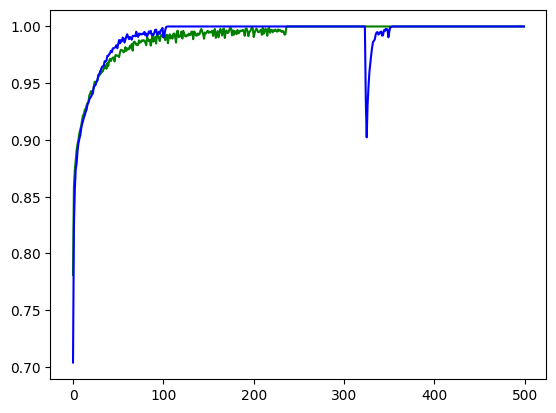

In [24]:
plt.plot(hist.history['accuracy'],color='green')
plt.plot(hist_cnn.history['accuracy'],color='blue')


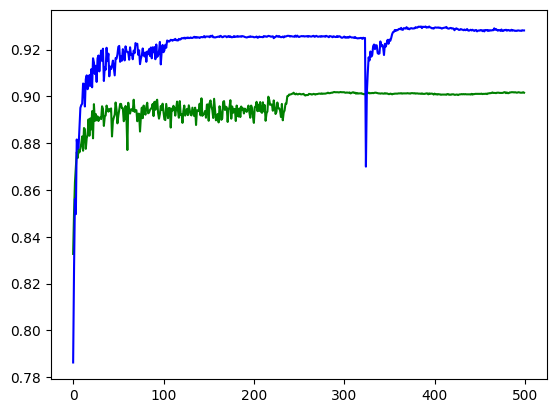

In [25]:
plt.plot(hist.history['val_accuracy'],color='green')
plt.plot(hist_cnn.history['val_accuracy'],color='blue')


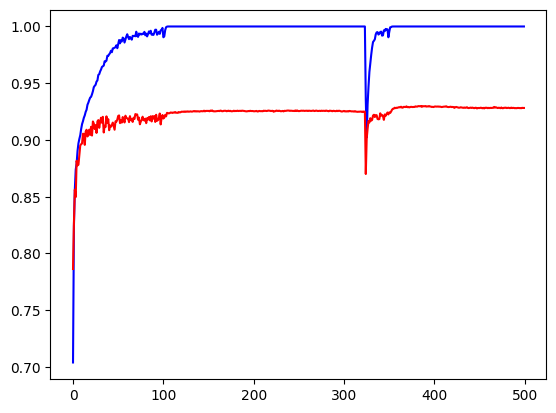

In [26]:
plt.plot(hist_cnn.history['accuracy'],color='blue')
plt.plot(hist_cnn.history['val_accuracy'],color='red')

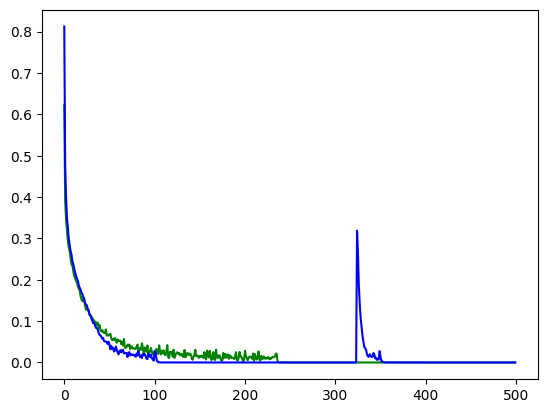

In [27]:
plt.plot(hist.history['loss'],color='green')
plt.plot(hist_cnn.history['loss'],color='blue')